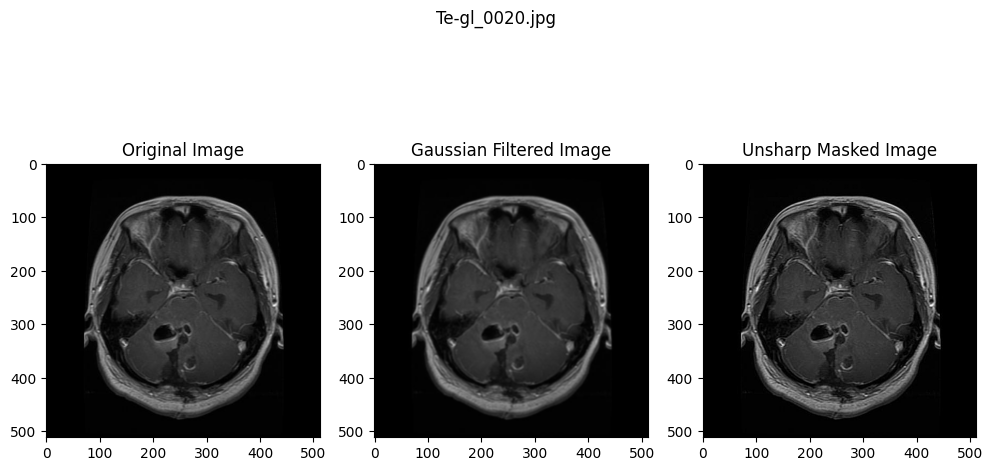

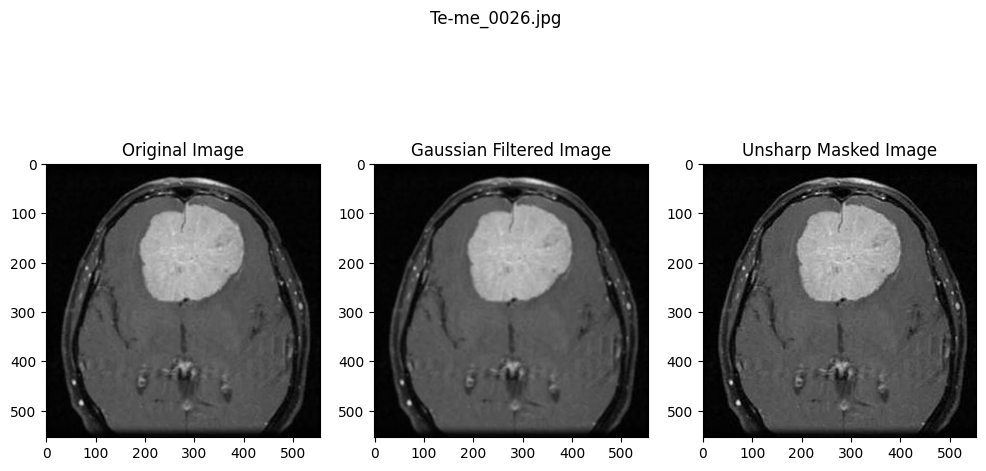

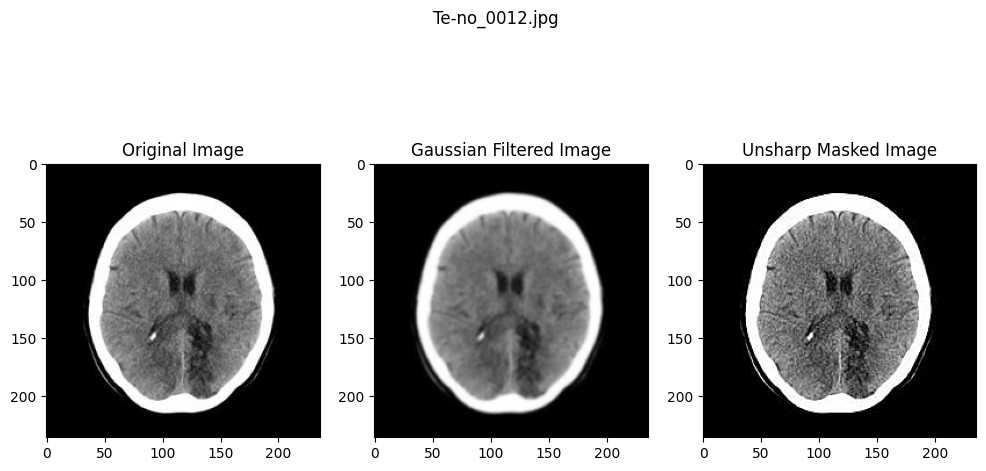

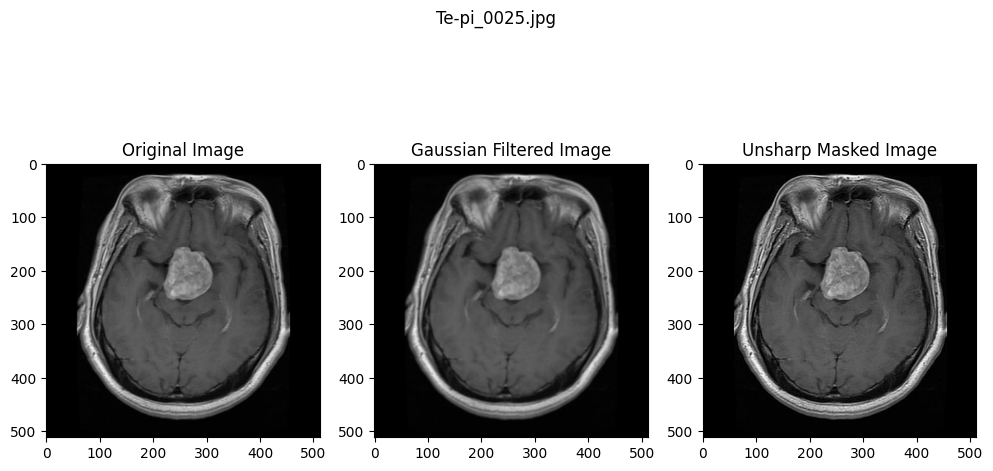

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Specify the path to your images folder in Google Drive
folder_path = '/content/drive/MyDrive/Dataset/Experiment'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append((filename, img))
    return images

def apply_gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def apply_unsharp_mask(image, gaussian_image, alpha=1.5):
    return cv2.addWeighted(image, 1 + alpha, gaussian_image, -alpha, 0)

def plot_images(original, gaussian, unsharp, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Filtered Image')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(unsharp, cv2.COLOR_BGR2RGB))
    plt.title('Unsharp Masked Image')

    plt.suptitle(title)
    plt.show()

# Load images from the folder
images = load_images_from_folder(folder_path)

# Process each image
for filename, image in images:
    gaussian_image = apply_gaussian_filter(image)
    unsharp_image = apply_unsharp_mask(image, gaussian_image)
    plot_images(image, gaussian_image, unsharp_image, title=filename)


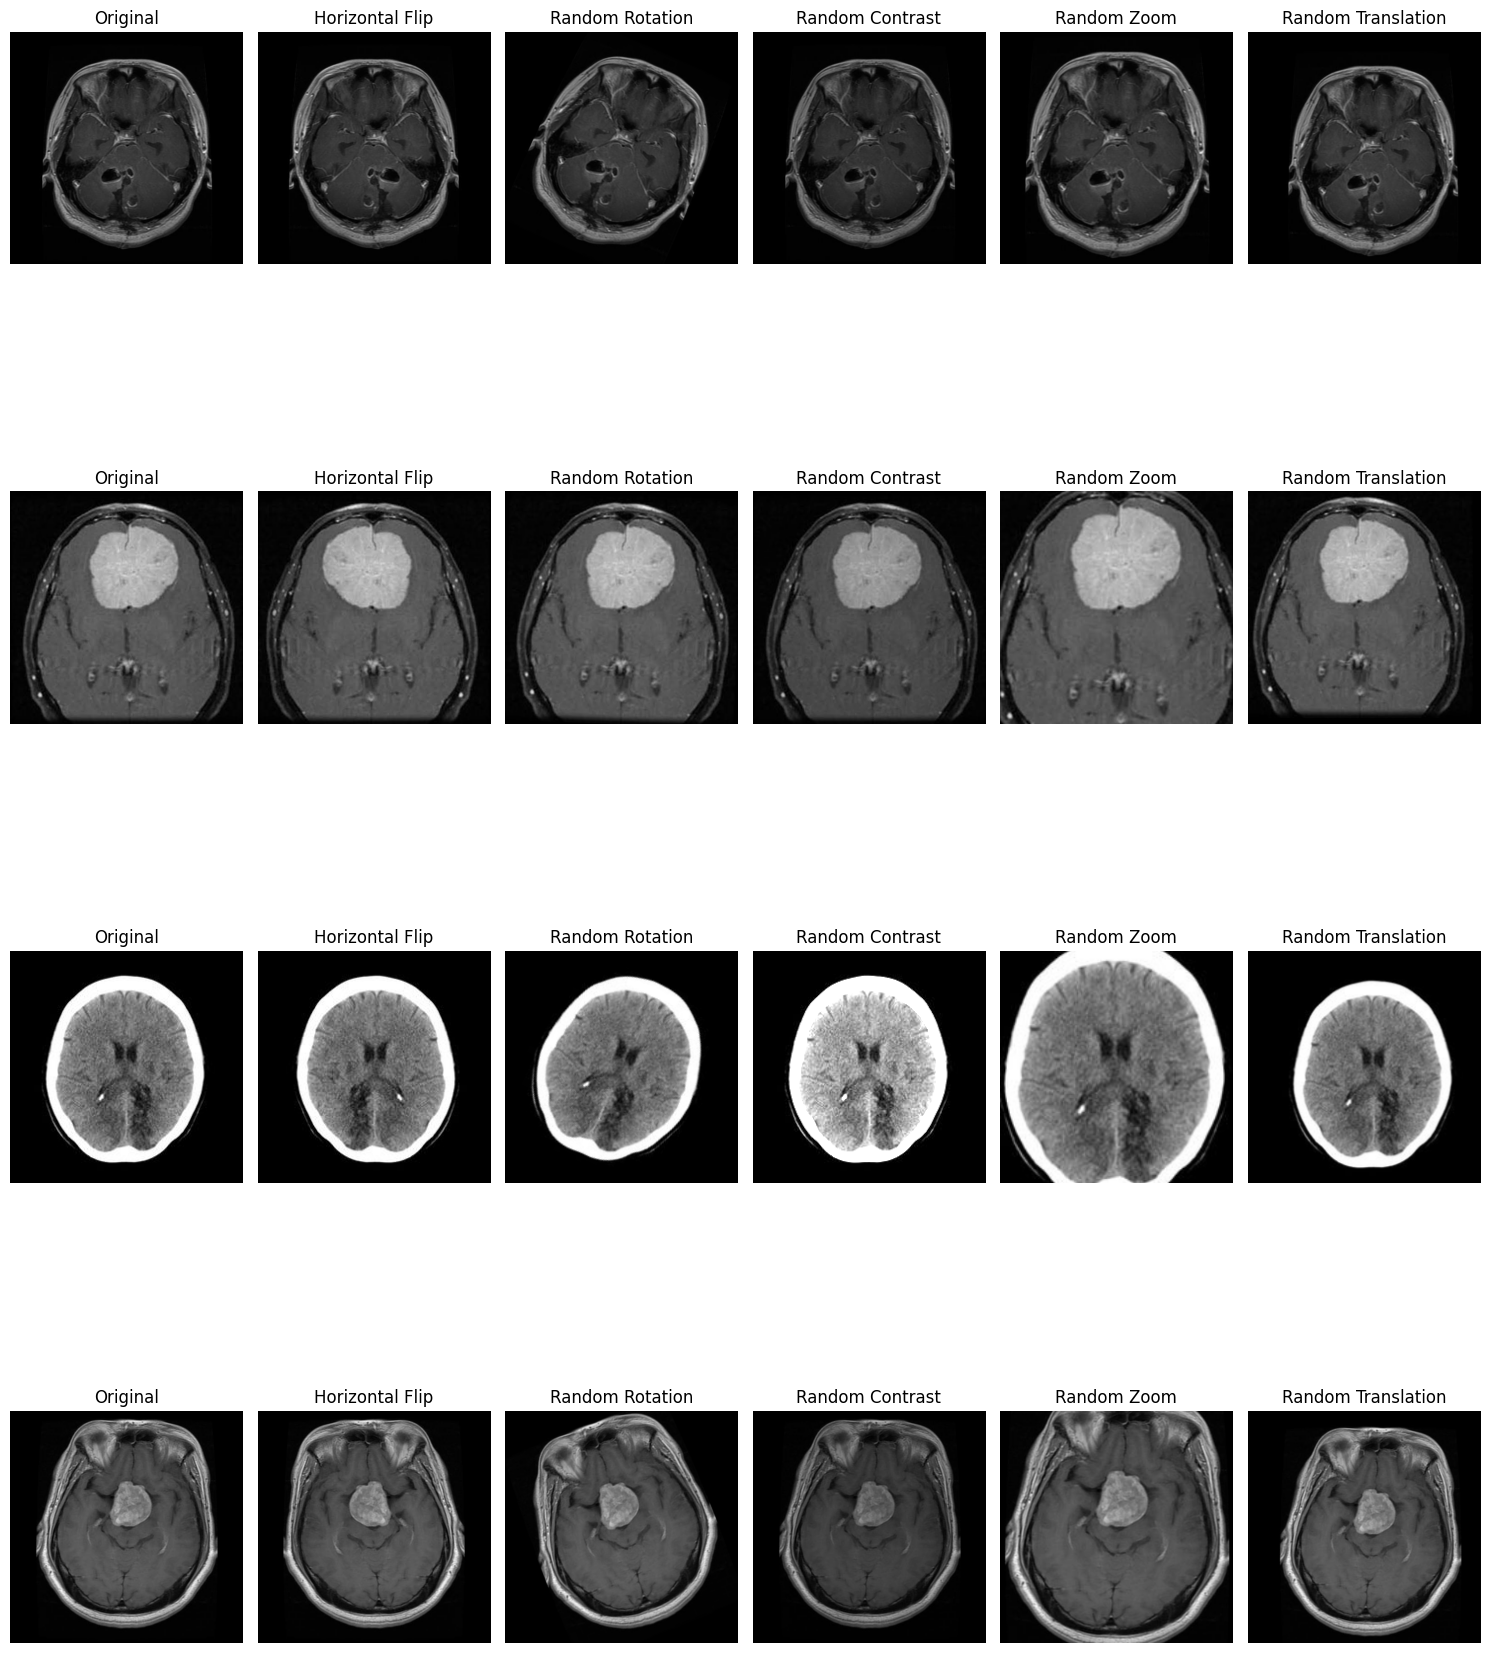

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Define augmentation functions

def horizontal_flip(image):
    return cv2.flip(image, 1)

def random_rotation(image):
    angle = random.uniform(-30, 30)
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (width, height))

def random_contrast_adjustment(image):
    alpha = random.uniform(0.5, 1.5)  # Simple contrast control
    adjusted = cv2.convertScaleAbs(image, alpha=alpha)
    return adjusted

def random_zoom(image):
    zoom_factor = random.uniform(1.0, 1.5)
    height, width = image.shape[:2]
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    zoomed = cv2.resize(image, (new_width, new_height))

    if zoom_factor > 1:
        # Crop the zoomed image to original size
        start_x = (new_width - width) // 2
        start_y = (new_height - height) // 2
        return zoomed[start_y:start_y+height, start_x:start_x+width]
    else:
        # Pad the zoomed image to original size
        pad_x = (width - new_width) // 2
        pad_y = (height - new_height) // 2
        return cv2.copyMakeBorder(zoomed, pad_y, height - new_height - pad_y, pad_x, width - new_width - pad_x, cv2.BORDER_CONSTANT, value=[0, 0, 0])

def random_translation(image):
    max_trans = 20  # Max pixels to translate
    tx = random.uniform(-max_trans, max_trans)
    ty = random.uniform(-max_trans, max_trans)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    height, width = image.shape[:2]
    return cv2.warpAffine(image, translation_matrix, (width, height))

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/Dataset/Experiment'

# Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Create a figure to display the images and their augmentations
plt.figure(figsize=(15, len(image_files) * 5))

# Process each image in the folder
for idx, image_file in enumerate(image_files):
    # Read the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Apply augmentations
    flipped_image = horizontal_flip(image)
    rotated_image = random_rotation(image)
    contrast_image = random_contrast_adjustment(image)
    zoomed_image = random_zoom(image)
    translated_image = random_translation(image)

    # Plot original and augmented images
    plt.subplot(len(image_files), 6, idx * 6 + 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(len(image_files), 6, idx * 6 + 2)
    plt.imshow(flipped_image)
    plt.title('Horizontal Flip')
    plt.axis('off')

    plt.subplot(len(image_files), 6, idx * 6 + 3)
    plt.imshow(rotated_image)
    plt.title('Random Rotation')
    plt.axis('off')

    plt.subplot(len(image_files), 6, idx * 6 + 4)
    plt.imshow(contrast_image)
    plt.title('Random Contrast')
    plt.axis('off')

    plt.subplot(len(image_files), 6, idx * 6 + 5)
    plt.imshow(zoomed_image)
    plt.title('Random Zoom')
    plt.axis('off')

    plt.subplot(len(image_files), 6, idx * 6 + 6)
    plt.imshow(translated_image)
    plt.title('Random Translation')
    plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
